# Dimensionality Reduction of IRIS Data using PCA

## Importing necessary Libraries 


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [78]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Splitting Features and Class Column

In [79]:
df.drop('Id',axis=1,inplace=True)
specs=df['Species']
df.drop('Species',axis=1,inplace=True)
val=df.values

## Standardization of Data

In [81]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_val=std.fit_transform(val)

## Finding Co-variance Matrix of Features

In [82]:
cov=np.dot(std_val.T,std_val)/len(val)

## Finding Eigen values and Eigen Vector of Co-variance Matrix

In [85]:
import numpy.linalg as LA
eig,vec=LA.eig(cov)
print("Eigen Values : \n\n{}\n".format(eig))
print("Corresponding Eigen Vectors : \n\n{}\n".format(vec))

Eigen Values : 

[2.91081808 0.92122093 0.14735328 0.02060771]

Corresponding Eigen Vectors : 

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]



## Extracting features

We want to reduce Dimensionality to 2-D. So we will choose only two vectors corresponding to the first two highest eigen values. We will do multiplication of features data with the eigen vectors. 

In [86]:
data=np.dot(val,(vec[0:2]).T)
ndf=pd.DataFrame(data,columns=["Feature 1","Feature 2"])
ndf["Species"]=specs
ndf.head()

,Feature 1,Feature 2,Species
0,0.403957,-4.268539,Iris-setosa
1,0.485641,-3.753090,Iris-setosa
2,0.378805,-3.909733,Iris-setosa
3,0.219596,-3.742435,Iris-setosa
4,0.314488,-4.334759,Iris-setosa


## Scatter plot of the Features

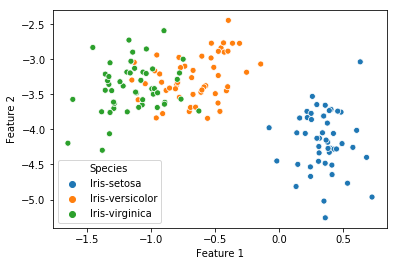

In [87]:
sns.scatterplot(data=ndf,x='Feature 1',y="Feature 2",hue="Species")
plt.show()

# PCA Using Scikit Learn

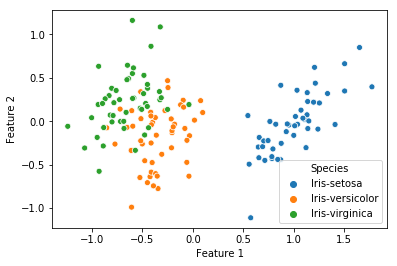

In [88]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pdf=pd.DataFrame(pca.fit_transform(data),columns=["Feature 1","Feature 2"])
pdf["Species"]=specs
sns.scatterplot(data=pdf,x='Feature 1',y="Feature 2",hue="Species")
plt.show()